In [30]:
import pandas as pd
import numpy as np
from scipy.sparse.csgraph import reverse_cuthill_mckee
from scipy.sparse import csr_matrix
import matplotlib.pylab as plt
import scipy.sparse as sps


In [12]:
df = pd.read_csv('online_retail_transaction.csv',header=None,index_col=None)

In [27]:
zero_data_to_add = np.zeros(shape=(len(df),len(df)-len(df.columns)))
columns_to_add = [x for x in range(len(df.columns),len(df))] 
df_to_add = pd.DataFrame(zero_data_to_add, columns=columns_to_add,dtype='uint8')

# creo il dataset completo aggiungendo tutti gli zeri che mancano
df_new_complete = pd.concat([df, df_to_add], axis=1)
df_new_complete

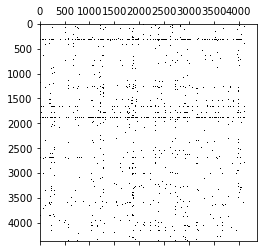

In [31]:
plt.spy(df_new_complete)
plt.show()

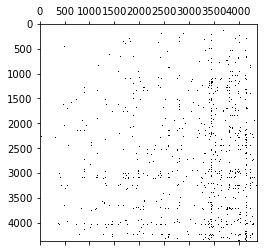

In [37]:
# after RCM
sparse = csr_matrix(df_new_complete)
order = reverse_cuthill_mckee(sparse)
plt.spy(df_new_complete.loc[order][order])
plt.show()

In [38]:
# dataframe dopo RCM
[i,j]=np.where(df_new_complete.loc[order][order] == 1)
bw = max(i-j) +1
bw

3991

In [39]:
# dataframe inizale
[i,j]=np.where(df_new_complete == 1)
bw = max(i-j) +1
bw

4363

In [46]:
file = open("lista_items.txt", "r") 
items = file.read().splitlines()

In [47]:
items

['20713',
 ' 4 PURPLE FLOCK DINNER CANDLES',
 " 50'S CHRISTMAS GIFT BAG LARGE",
 ' DOLLY GIRL BEAKER',
 ' I LOVE LONDON MINI BACKPACK',
 ' I LOVE LONDON MINI RUCKSACK',
 ' NINE DRAWER OFFICE TIDY',
 ' OVAL WALL MIRROR DIAMANTE ',
 ' RED SPOT GIFT BAG LARGE',
 ' SET 2 TEA TOWELS I LOVE LONDON ',
 ' SPACEBOY BABY GIFT SET',
 ' TOADSTOOL BEDSIDE LIGHT ',
 ' TRELLIS COAT RACK',
 '*Boombox Ipod Classic',
 '*USB Office Mirror Ball',
 '10 COLOUR SPACEBOY PEN',
 '12 COLOURED PARTY BALLOONS',
 '12 DAISY PEGS IN WOOD BOX',
 '12 EGG HOUSE PAINTED WOOD',
 '12 HANGING EGGS HAND PAINTED',
 '12 IVORY ROSE PEG PLACE SETTINGS',
 '12 MESSAGE CARDS WITH ENVELOPES',
 '12 PENCIL SMALL TUBE WOODLAND',
 '12 PENCILS SMALL TUBE RED RETROSPOT',
 '12 PENCILS SMALL TUBE SKULL',
 '12 PENCILS TALL TUBE POSY',
 '12 PENCILS TALL TUBE RED RETROSPOT',
 '12 PENCILS TALL TUBE SKULLS',
 '12 PENCILS TALL TUBE WOODLAND',
 '12 PINK HEN+CHICKS IN BASKET',
 '12 PINK ROSE PEG PLACE SETTINGS',
 '12 RED ROSE PEG PLACE SETTINGS',
